In [110]:
#Tony Huang wrote the code that plotted the Klein-Nishina formula. Vasily Soloview wrote the code that found the measured cross sections
#and plotted them in comparison to the theoretical formula.

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

N=1.02*10**(25)
I=1.92*10**(4)
O=5.4*10**(-3)

def cross_section(x):
    return x/(N*I*O)
def d_cross_section(x):
    return np.sqrt((x/(N*I*O))**2)

R = np.array([35.6, 30.3, 20.4, 13.4, 7.7, 7.1, 6.7])
dR = np.array([0.5, 0.5, 0.6, 0.3, 0.1, 0.2, 0.1])

ds_dO = cross_section(R)
d_ds_dO = d_cross_section(dR)

print(ds_dO)
print(d_ds_dO)

[3.36631566e-26 2.86515069e-26 1.92901235e-26 1.26709634e-26
 7.28107601e-27 6.71371944e-27 6.33548172e-27]
[4.72797144e-28 4.72797144e-28 5.67356572e-28 2.83678286e-28
 9.45594287e-29 1.89118857e-28 9.45594287e-29]


1.7390344644509188


<IPython.core.display.Javascript object>


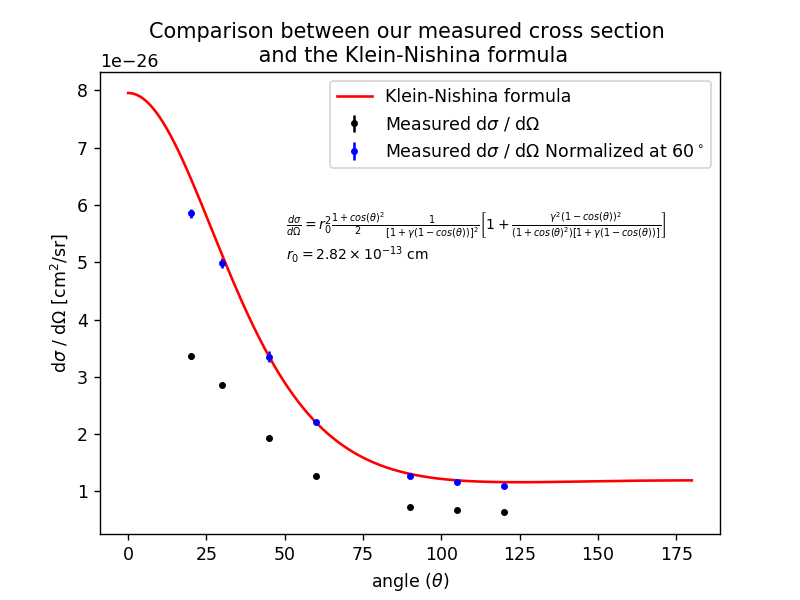

In [111]:
# theoretical calculations

gamma = 662/511
#gamma = 1.20
r = 2.82 *10 **(-13)
t1 = np.linspace(0, 180, 5000)

def klein_nishina(x):
    return r ** 2 *(1 + np.square(np.cos(x))) / (2 * np.square(1 + gamma * (1 - np.cos(x)))) * (1 + np.square(gamma) * np.square(1 - np.cos(x)) / ((1 + np.square(np.cos(x))) * (1 + gamma*(1 - np.cos(x)))))
                                                                                                
angles = np.array([20, 30, 45, 60, 90, 105, 120])
scale = klein_nishina(60*np.pi/180)/ds_dO[3]
print(scale)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t1, klein_nishina(t1/180*np.pi), 'r-', label="Klein-Nishina formula")
ax.errorbar(angles, ds_dO, d_ds_dO, fmt='k.', label="Measured d$\\sigma$ / d$\\Omega$")
ax.errorbar(angles, ds_dO*klein_nishina(60*np.pi/180)/ds_dO[3], d_ds_dO*klein_nishina(60*np.pi/180)/ds_dO[3], fmt='b.', label="Measured d$\\sigma$ / d$\\Omega$ Normalized at 60$^\\circ$")
ax.set_title('Comparison between our measured cross section \n and the Klein-Nishina formula')
ax.set_xlabel('angle ($\\theta$)')
ax.set_ylabel('d$\\sigma$ / d$\\Omega$ [cm$^{2}$/sr]')
ax.legend()
plt.show()

textfit = '$\\frac{d\\sigma}{d\\Omega} = r_0^2 \\frac{1 + cos(\\theta)^2}{2} \\frac{1}{[1 + \\gamma(1- cos(\\theta))]^2}\\left[1 + \\frac{\\gamma^2(1-cos(\\theta))^2}{(1+cos(\\theta)^2)[1 + \\gamma(1-cos(\\theta))]}\\right]$ \n' \
          '$r_0 = 2.82 \\times 10^{-13}$ cm\n' \

ax.text(0.3, 0.7, textfit, transform=ax.transAxes, fontsize=8,
    verticalalignment='top')

plt.savefig('Klein_Nishina_theoretical.pdf')